In [5]:

import project_driver as hc
import numpy as np


# Hugo's converter: a practical guide

During my last year ½ at with the cosmic dawn group, I designed an algorithm to fit for z-reion parameters using 21cmFAST inouts or any other density or redshfit of reionization field. Here's a quick guide on how to use the main functions of the package 

## Running  it's simplest form

It's simplest form: Hugo's converter will run 21cmFASt with all it's default parameters, and output the best fit value of it's free parameters : alpha, b_0 and k_0

In [3]:
hc.get_params_values()

/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/py21cmfast/inputs.py:485: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
computing the redshift of reionization: 100%|███| 60/60 [02:51<00:00,  2.86s/it]
/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/powerbox/dft.py:97: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")
/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/powerbox/tools.py:146: RuntimeWarning: invalid value encountered in true_divide
  bins = np.bincount(indx, weights=(weights * coords).flatten(), min

(1.9781825148427286, 1.2308322374438014, 0.6778862752543972)

## but the converter has so many other options

### 1. modify Box length and size

In [15]:
#in the following example, I have a box of 200Mpc³ that are composed of 300³ voxels
#I also have adjusted the range range to go quicker
# Please note that the units of the parameters are the same as the one entered in box_len
hc.get_params_values(box_dim = 100, box_len = 200, redshift_range = np.linspace(5,18,15))

100%|█████████████████████████████████████| 5000/5000 [00:04<00:00, 1246.28it/s]


(2.606279536173081, 1.1517441967717281, 0.877543555014364)

### 2. Get the confidence range (68% of the posterior distribution)


In [11]:
hc.get_params_values(include_confidencerange = True, redshift_range = np.linspace(5,18,60))

100%|█████████████████████████████████████| 5000/5000 [00:04<00:00, 1201.44it/s]


([1.3396773235936024, 1.94989352230679, 2.887417344235558],
 [1.1419135598281662, 1.231582190195832, 1.392800284510482],
 [0.3865171579175717, 0.6708959927199497, 1.115183838382584])

### 3. Make sure that the process goes well by (can therefore decide to go for medians as best value)

  0%|                                                  | 0/5000 [00:00<?, ?it/s]/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████| 5000/5000 [00:04<00:00, 1162.24it/s]


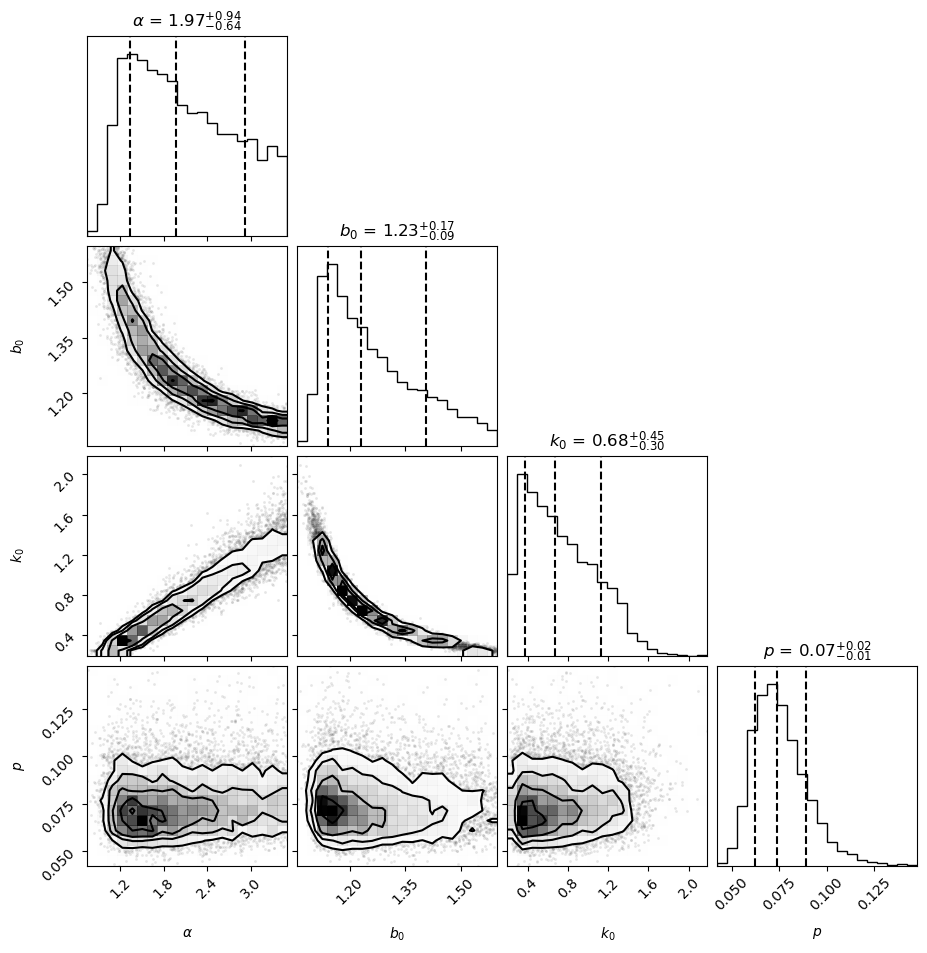

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


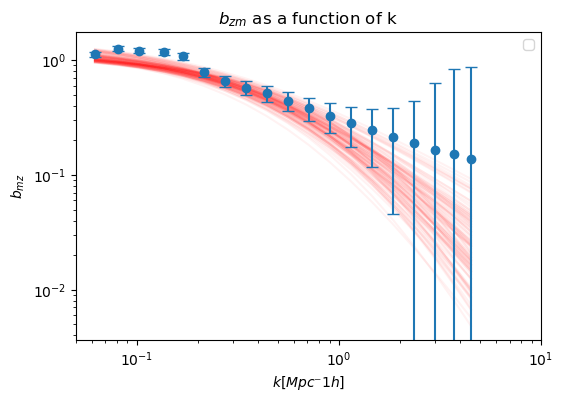

([1.3335379786353, 1.9719663604447886, 2.9100306113847094],
 [1.1405552409522643, 1.2309756601384678, 1.405689651551839],
 [0.3737225825785771, 0.6752075890007883, 1.125237884336955])

In [13]:
hc.get_params_values(include_confidencerange = True, plot_best_fit= True, plot_corner = True, redshift_range = np.linspace(5,18,60))

### 4. Output the density fields and/or the redshfit of reionization field 


100%|█████████████████████████████████████| 5000/5000 [00:04<00:00, 1176.52it/s]


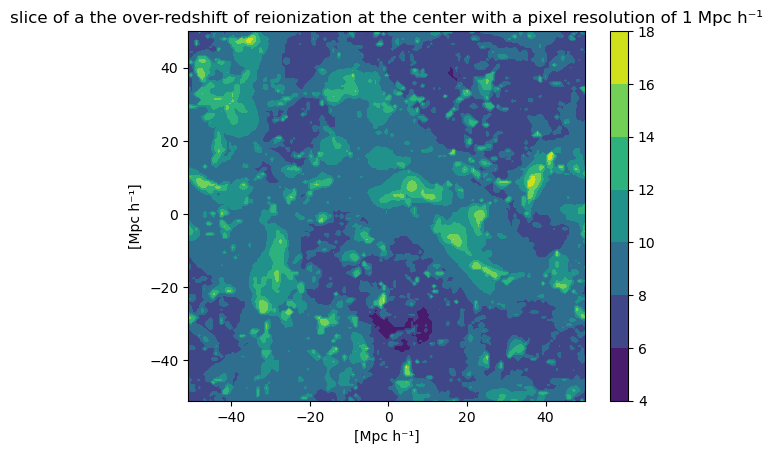

In [21]:
# in bonus, let's try it with different astro_params plot a slice of the produces redshift of reionization field.
a,b_0,k_0,density_field, zre_field = hc.get_params_values(return_zre_field = True, return_density = True, astro_params = {'HII_EFF_FACTOR':45})
hc.zre.plot_zre_slice(zre_field)

### 5. Input your own density field (also work for z_re field)

## Apply to z-reion

This package comes in bonus with Paul Laplante z-reion's package. You can use your finding with my algorithm to test a bunch of redshfit of reionization field! 

Let's try an example where we used the parameters from the field above to plot for the redshfit of reionization field


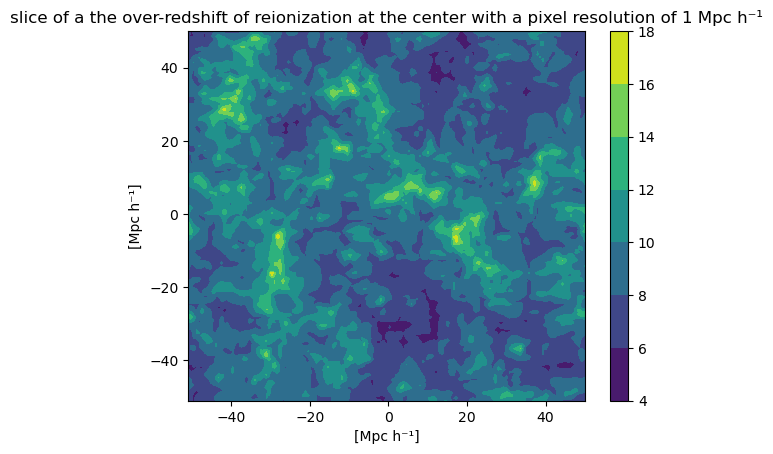

In [24]:
zre_zreion = hc.zr.apply_zreion(density_field, np.mean(zre_field), a,k_0, 143, b0 = b_0)
hc.zre.plot_zre_slice(zre_zreion)

## Other available functions

### Run simple 21cmFAST fields (such as brightness temperature) and save them

### Run several runs with different parameter value

Here is an example of the dictionnary it gives : 

{'Z_re': [8.23401510640146, 8.036739240025454, 7.832725722821644, 7.62925343031949, 7.410530751741991, 7.182371759424072, 6.924895431095525, 6.62988797876986, 6.2839108943005115, 5.89755181699601, 5.48411175391887, 5.03311008936852, 4.544029746128345, 4.054363128470839], 'Heff': [8.5, 8.607142857142858, 8.714285714285714, 8.821428571428571, 8.928571428571429, 9.035714285714286, 9.142857142857142, 9.25, 9.357142857142858, 9.464285714285714, 9.571428571428571, 9.678571428571429, 9.785714285714285, 9.892857142857142], 'medians': [array([2.67957484, 0.98607503, 2.67449285, 0.03351739]), array([1.39740164, 1.02094306, 1.03944036, 0.0269524 ]), array([1.12757185, 0.99028645, 0.8610585 , 0.04180708]), array([1.4689044 , 1.03180484, 1.1036107 , 0.0341851 ]), array([1.48434779, 1.07176596, 1.06909846, 0.03675563]), array([1.40125548, 1.22270194, 0.75894785, 0.05197821]), array([1.16938932, 1.4113669 , 0.56415932, 0.04716416]), array([3.26288602, 1.18481508, 1.92758529, 0.07812695]), array([2.13132732, 1.41102185, 1.22230405, 0.07357369]), array([2.7717923 , 1.35422767, 1.50836578, 0.05741202]), array([2.58018654, 1.52014361, 1.09971573, 0.0961823 ]), array([3.31156796, 1.37478154, 1.75602212, 0.10914802]), array([3.41632124, 1.39994978, 1.75499781, 0.10517893]), array([3.24337916, 1.44491372, 1.56906187, 0.08989963])], 'a16': [array([1.06772692]), array([1.0389634]), array([1.04338462]), array([1.07433317]), array([1.1227459]), array([1.12632081]), array([1.26403155]), array([1.5305827]), array([1.82594722]), array([2.11710686]), array([2.34314535]), array([2.49521884]), array([2.59050707]), array([2.6400839])], 'a50': [array([1.45563871]), array([1.43523435]), array([1.51316457]), array([1.51331861]), array([1.6237272]), array([1.68802481]), array([1.74525456]), array([2.06168323]), array([2.32325003]), array([2.55557655]), array([2.73610086]), array([2.87036409]), array([2.94876754]), array([3.00768446])], 'a84': [array([2.13755472]), array([2.18640437]), array([2.32993431]), array([2.34667421]), array([2.54497718]), array([2.60071278]), array([2.60302357]), array([2.89906796]), array([3.04867494]), array([3.15114573]), array([3.2169759]), array([3.28044184]), array([3.31879585]), array([3.34803945])], 'b16': [array([0.98107454]), array([0.9859628]), array([0.99502914]), array([1.01248172]), array([1.04314999]), array([1.09256942]), array([1.15778745]), array([1.20498075]), array([1.26350812]), array([1.3185163]), array([1.36121467]), array([1.38732665]), array([1.40179622]), array([1.40916874])], 'b50': [array([0.99752961]), array([1.00591716]), array([1.0185331]), array([1.0441968]), array([1.09048794]), array([1.16808848]), array([1.26916328]), array([1.31816927]), array([1.36808306]), array([1.41321572]), array([1.4433465]), array([1.45778264]), array([1.4661899]), array([1.46757743])], 'b84': [array([1.02956477]), array([1.04779399]), array([1.06940876]), array([1.10732999]), array([1.18066088]), array([1.32137971]), array([1.44124669]), array([1.48452199]), array([1.50945386]), array([1.53208]), array([1.54631149]), array([1.54644377]), array([1.5503669]), array([1.5512494])], 'k16': [array([0.72316968]), array([0.66513344]), array([0.64130475]), array([0.62551893]), array([0.6123717]), array([0.53587644]), array([0.56379249]), array([0.70320621]), array([0.8720493]), array([0.98778812]), array([1.07327213]), array([1.17626411]), array([1.24679266]), array([1.32320576])], 'k50': [array([1.17033486]), array([1.11701048]), array([1.14467553]), array([1.08762847]), array([1.08666076]), array([1.01761697]), array([0.94672979]), array([1.10293092]), array([1.22509322]), array([1.27969381]), array([1.33067692]), array([1.41228035]), array([1.48021332]), array([1.55971475])], 'k84': [array([1.98516031]), array([1.99254687]), array([2.06128692]), array([1.97063367]), array([1.98929128]), array([1.82703478]), array([1.6421218]), array([1.74579708]), array([1.7363513]), array([1.66982044]), array([1.64470666]), array([1.6899502]), array([1.75357905]), array([1.82487224])], 'p16': [array([0.02432335]), array([0.0262314]), array([0.02899691]), array([0.03271022]), array([0.03820812]), array([0.04637316]), array([0.05347161]), array([0.05811497]), array([0.05838639]), array([0.06392697]), array([0.0714511]), array([0.08352152]), array([0.09272328]), array([0.10062216])], 'p50': [array([0.0286552]), array([0.03114748]), array([0.03446472]), array([0.03858835]), array([0.04507514]), array([0.05477362]), array([0.06340401]), array([0.06832295]), array([0.06865855]), array([0.07560986]), array([0.0851286]), array([0.09806414]), array([0.1086317]), array([0.11742736])], 'p84': [array([0.03464905]), array([0.03774013]), array([0.04154155]), array([0.04655266]), array([0.05442553]), array([0.06588343]), array([0.07682141]), array([0.08202272]), array([0.08213592]), array([0.09072879]), array([0.10236306]), array([0.11744317]), array([0.12781359]), array([0.13519904])], 'width50': [2.05050505050505, 1.9797979797979801, 1.9797979797979792, 1.9797979797979801, 1.7676767676767673, 1.8383838383838382, 1.8383838383838391, 1.7676767676767673, 1.7676767676767682, 1.7676767676767682, 1.7676767676767673, 1.8383838383838382, 1.6262626262626263, 1.4141414141414144], 'width90': [5.656565656565656, 5.656565656565656, 5.373737373737374, 5.373737373737373, 5.373737373737374, 5.585858585858586, 5.444444444444445, 5.444444444444445, 5.232323232323232, 4.949494949494948, 4.737373737373737, 4.525252525252526, 4.313131313131313, 4.1010101010101]}


### Run 2D parameters space run to verify the effect of 2 simultanesouly varying parameters (stored under an object)

With this you can also test a bunch of features, such as the brightness temperature 